# Feature at Location Matching with Graphs
Script to analyze runs from `feature_matching_evaluation.py` First, run all experiments in this file to generate the data analyzed here.

Run 
```
python ./projects/monty_runs/run.py -e supervised_pre_training_base supervised_pre_training_small_steps supervised_pre_training_on_mesh
```
to generate the pretrained models. And then run:
```
python ./projects/monty_runs/run.py -e partial_rotation_eval_base
python ./projects/monty_runs/run.py -e sampling_learns3_infs5
python ./projects/monty_runs/run.py -e partial_rotation_eval_on_mesh
```
to evaluate the detection performance under different conditions.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from tbp.monty.frameworks.utils.logging_utils import (
    load_stats, 
    get_time_stats,)

In [3]:
log_path = '../feature_eval_runs/logs/'
# log_path = '../feature_eval_runs/alt_params/logs/'
# log_path = '../feature_eval_runs/alternative_params/logs/'

pretrained_5S = '../feature_eval_runs/pretrained_ycb4_stepsize5/supervised_pre_training_base/pretrained/'
pretrained_5S_71Obj = '../feature_eval_runs/pretrained_ycb71_stepsize5/supervised_pre_training_all_objects/pretrained/'
pretrained_3S = '../feature_eval_runs/pretrained_ycb4_stepsize3/supervised_pre_training_small_steps/pretrained/'
pretrained_mesh = '../feature_eval_runs/pretrained_models_from_mesh/ycb4_3000p/'

SAVE_FIGS = False

### Load the stats

In [43]:
# sensor default
_, partial_rotation_eval_stats, ds5, s5_models = load_stats(log_path + 'partial_rotation_eval_base', load_train=False, load_eval=True, load_detailed=True, pretrained_dict=pretrained_5S)

...loading and checking eval statistics...
...loading detailed run statistics...
...loading LM models...


In [28]:
# sensor 3:5

_, sampling_learnS3_infS5_stats, ds3, s3_models = load_stats(log_path + 'sampling_learnS3_infS5', load_train=False, load_eval=True, load_detailed=True, pretrained_dict=pretrained_3S)
                                

...loading and checking eval statistics...
...loading detailed run statistics...
...loading LM models...


In [34]:
# mesh
_, partial_rotation_eval_on_mesh_stats, dsm, mesh_models = load_stats(log_path + 'partial_rotation_eval_on_mesh', load_train=False, load_eval=True, load_detailed=True, pretrained_dict=pretrained_mesh)


...loading and checking eval statistics...
...loading detailed run statistics...
...loading LM models...


### Look at Performance

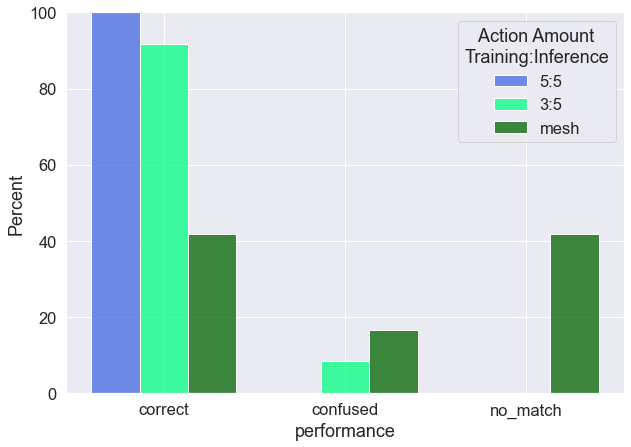

In [44]:
sampling_dfs = [partial_rotation_eval_stats,
                sampling_learnS3_infS5_stats,
                partial_rotation_eval_on_mesh_stats,
                ]
sampling_results = pd.concat(sampling_dfs, keys=['5:5', '3:5', 'mesh'])
sampling_results.index.names = ['experiment', 'index']

plt.figure(figsize=(10,7))
g = sns.histplot(data=sampling_results, x="performance", hue="experiment", 
                 multiple="dodge", shrink=.8, stat='percent', common_norm=False,
                palette=['royalblue','springgreen','darkgreen'])
legend = g.get_legend()
legend.set_title('   Action Amount\nTraining:Inference')
plt.ylim([0,100])
plt.show()

### Look at Runtime

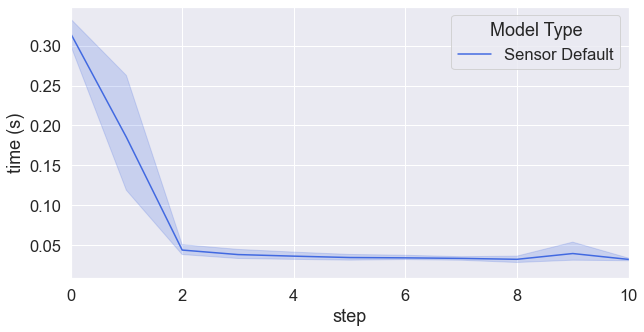

In [42]:
# sensor default only
all_ds = [ds5]
all_conditions = ['Sensor Default']
time_stats = get_time_stats(all_ds, all_conditions)

sns.set(font_scale = 1.5)
plt.figure(figsize=(10,5))
g = sns.lineplot(data=time_stats, x="step", y="time", hue="model_type",
                palette=['royalblue'])
legend = g.get_legend()
legend.set_title('Model Type')
plt.ylabel("time (s)")
plt.xlim([0,10])
plt.show()

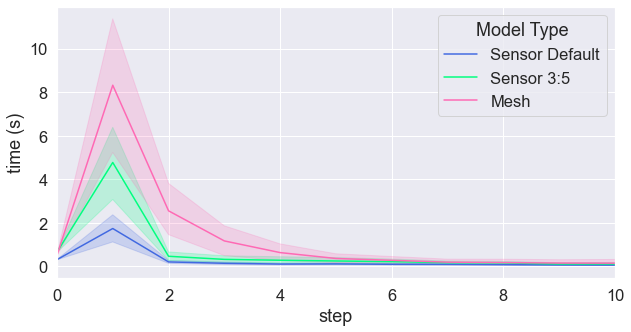

In [31]:
# sensor default, sensor detailed, and mesh
all_ds = [ds5, ds3, dsm]
all_conditions = ['Sensor Default', 'Sensor 3:5', 'Mesh']
time_stats = get_time_stats(all_ds, all_conditions)

sns.set(font_scale = 1.5)
plt.figure(figsize=(10,5))
g = sns.lineplot(data=time_stats, x="step", y="time", hue="model_type",
                palette=['royalblue','springgreen','hotpink'])
legend = g.get_legend()
legend.set_title('Model Type')
plt.ylabel("time (s)")
plt.xlim([0,10])
plt.show()